In [41]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [42]:
# reading the data
series = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True,squeeze=True)
len(series)

42

In [43]:
series.head()

Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Name: Sales, dtype: float64

In [44]:
# Different tsa visualisations

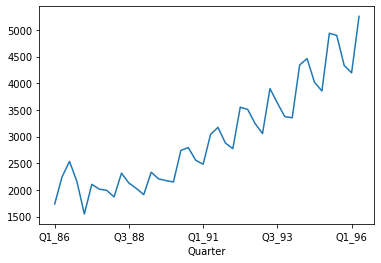

In [45]:
# line plot
series.plot()
pyplot.show()

<AxesSubplot:>

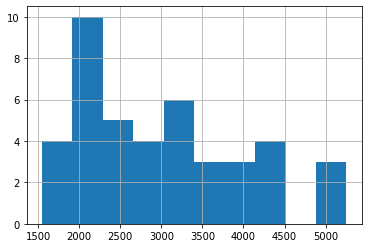

In [46]:
series.hist()

<AxesSubplot:ylabel='Density'>

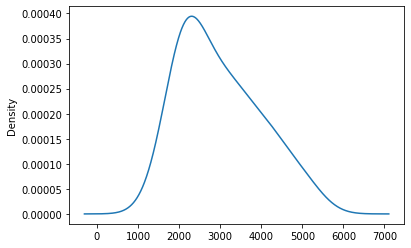

In [47]:
series.plot(kind='kde')

In [48]:
# ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series1,lags=30)
pyplot.show()

NameError: name 'series1' is not defined

In [ ]:
# PACF plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series,lags=30)
pyplot.show()

In [49]:
# separate out a validation dataset
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]


In [9]:
# storing the datasets
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

### Building ARIMA 

In [13]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


In [14]:
# Building model for evaluation of different hyperparameters
def evaluate_arima_model(X, arima_order):
    X = X.astype('float32')
    split_size = int(len(X) * 0.60)
    train, test = X[0:split_size], X[split_size:]
    pastdata = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(pastdata, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        pastdata.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [15]:
# defining model for  evaluating combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p, d, q):
    
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    
    p_values = range(0, p+1)
    d_values = range(0, d+1)
    q_values = range(0, q+1)
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [16]:
# calling the model for different p q d values
warnings.filterwarnings("ignore")
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p = 5
d = 5
q = 5

evaluate_models(train.values, p, d, q)

ARIMA(0, 0, 0) RMSE=1107.522
ARIMA(0, 0, 1) RMSE=779.216
ARIMA(0, 0, 2) RMSE=447.486
ARIMA(0, 0, 3) RMSE=680.840
ARIMA(0, 0, 4) RMSE=682.295
ARIMA(0, 1, 0) RMSE=454.831
ARIMA(0, 1, 1) RMSE=454.685
ARIMA(0, 1, 2) RMSE=420.846
ARIMA(0, 1, 3) RMSE=376.438
ARIMA(0, 1, 4) RMSE=265.379
ARIMA(0, 1, 5) RMSE=297.526
ARIMA(0, 2, 0) RMSE=692.195
ARIMA(0, 2, 1) RMSE=473.249
ARIMA(0, 2, 2) RMSE=434.993
ARIMA(0, 2, 3) RMSE=415.411
ARIMA(0, 2, 5) RMSE=245.530
ARIMA(1, 0, 0) RMSE=531.593
ARIMA(1, 0, 1) RMSE=532.252
ARIMA(1, 1, 0) RMSE=453.754
ARIMA(1, 1, 1) RMSE=438.930
ARIMA(1, 2, 0) RMSE=660.693
ARIMA(1, 2, 1) RMSE=471.790
ARIMA(2, 0, 0) RMSE=540.460
ARIMA(2, 1, 0) RMSE=363.469
ARIMA(2, 1, 1) RMSE=350.524
ARIMA(2, 2, 0) RMSE=572.563
ARIMA(2, 2, 1) RMSE=364.266
ARIMA(3, 0, 0) RMSE=446.483
ARIMA(3, 1, 0) RMSE=263.614
ARIMA(3, 2, 0) RMSE=183.925
ARIMA(4, 0, 0) RMSE=379.338
ARIMA(4, 1, 0) RMSE=191.943
ARIMA(4, 2, 0) RMSE=185.468
ARIMA(5, 1, 0) RMSE=200.268
Best ARIMA(3, 2, 0) RMSE=183.925


#### Fitting the data for test data


In [50]:
# load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

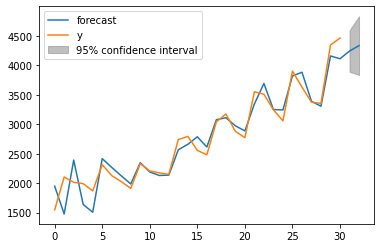

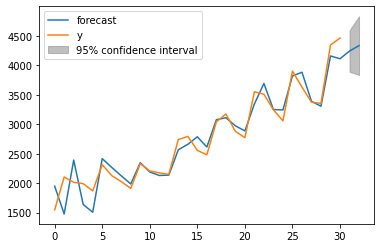

In [53]:
# fitting model and testing with test data
model = ARIMA(X, order=(3,2,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=7)[0]
model_fit.plot_predict(3,35)

In [30]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

800.12269344374

In [ ]:
# error is fine but from the plat it does not seem very good fit
# so further fine tuing may be rrequired

#### Combine train and test data and build final model

In [57]:
# reading complete data 
X = series.values
X = X.astype('float32')

In [59]:
# fitting the model
model = ARIMA(X, order=(3,2,0))
model_fit = model.fit()

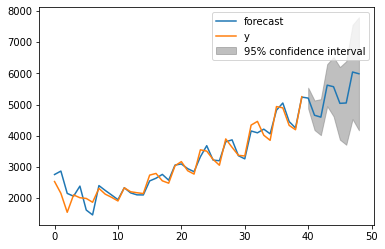

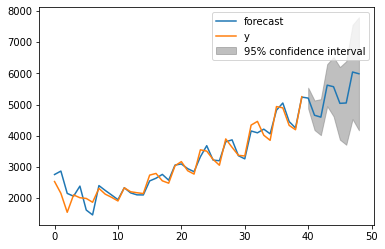

In [38]:
# fore casting and visualisation
# now it seems the data and predicion looks convincing
forecast=model_fit.forecast(steps=8)[0]
model_fit.plot_predict(2,50)

In [39]:
# the forecast values are
forecast

array([5207.86226534, 4658.14192135, 4597.40629488, 5622.19407896,
       5571.9547485 , 5039.18304279, 5050.92312462, 6043.42880168])